In [ ]:
# @ TODO Try and create a way to read from the directory without having to repast the code here.

In [6]:
import cv2
import os
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt


from tensorflow import keras
import numpy as np
import tensorflow as tf
import sys
sys.path.append("../multiclass_MLP_v1_alternate")


#      START OF TESTING

from tensorflow import keras
import cv2
import os
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt


def load_add_operator_dataset():

  images_names = os.listdir("../datasets/full_+_preprocessed/")
  add_images = []
  for img_name in images_names:
    image = cv2.imread('../datasets/full_+_preprocessed/'+ img_name, 0)

    add_images.append(image)

  # Convert image to numpy array to match MNIST datatype
  images = np.asarray(add_images)

  # Load labels
  image_labels = create_add_operator_labels()

  # Convert labels to numpy array to match MNIST datatype
  image_labels = np.asanyarray(image_labels)

  # Remove 14% for test
  # X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
  labels_frac = math.ceil(len(image_labels) * (1/7)) # >>> 604
  images_test, images_train = images[:labels_frac] / 255., images[labels_frac:] / 255. 
  labels_test, labels_train = image_labels[:labels_frac] / 255., image_labels[labels_frac:] / 255. 

  # Take another 8% for validation set, remainder stays in train
  labels_frac = math.ceil(len(image_labels) * (.5/6)) # >>> 353
  images_valid, images_train = images[:labels_frac] / 255., images[labels_frac:] / 255. 
  labels_valid, labels_train = image_labels[:labels_frac] / 255., image_labels[labels_frac:] / 255. 

  return images_train, images_valid, images_test, labels_train, labels_valid, labels_test


# Create float labels for every item in directory
def create_add_operator_labels():
  preprocessed_image_names = os.listdir("../datasets/full_+_preprocessed/")
  add_labels = 10
  y_add_labels = [add_labels for img in range(len(preprocessed_image_names))]

  return np.asarray(y_add_labels)

# @brief Generate data subsets for neural net model.
def create_mnist_train_test():
  # number of images, 28x28 pixels
  # Shape: X:(60000, 28, 28), Y:(10000, 28, 28)
  (X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

  # print(type(X_train_full))
  # print("train_full len: ", len(X_train_full))

  # Create validation set and convert to float in 0-1 range
  X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
  y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
  X_test = X_test / 255.

  # Append 
  # add_labels = create_add_operator_labels()
  # can probably break this up to images then labels
  add_train, add_valid, add_test, y_add_train, y_add_valid, y_add_test = load_add_operator_dataset()

  # print("mnist train shape: ", X_train.shape)

  # print(" @@@@@@@@@@@")
  # print("valid new len", len(y_add_valid))
  # print("X_valid new len", len(add_valid))


  # Add add images to MNIST 
  X_train_new = np.concatenate((X_train, add_train))
  X_test_new = np.concatenate((X_test, add_test))
  X_valid_new = np.concatenate((X_valid, add_valid))
  del add_train, add_valid, add_test
  

  y_train_new = np.concatenate((y_train, y_add_train))
  y_valid_new = np.concatenate((y_valid, y_add_valid))
  y_test_new = np.concatenate((y_test, y_add_test))
  del y_add_train, y_add_valid, y_add_test

  # print(" @@@@@@@@@@@")
  # print("valid new len", len(y_valid_new))
  # print("X_valid new len", len(X_valid_new))

  #@ TODO consider deleting old variables using the "del" command
  # print("new len", len(y_train_new))

  # Find shuffling algorithm to rearrange the add images and labels
  idx = np.random.permutation(len(y_train_new))
  X_train_new_sh, y_train_new_sh = X_train_new[idx], y_train_new[idx]

  idx = np.random.permutation(len(y_valid_new))
  X_valid_new_sh, y_valid_new_sh = X_valid_new[idx], y_valid_new[idx]

  idx = np.random.permutation(len(y_test_new))
  X_test_new_sh, y_test_new_sh = X_test_new[idx], y_test_new[idx]

  # i = 0
  # while (i < 10):
  #   print("img index", y_train_new_sh[55000 + i])
  #   plt.imshow(X_train_new_sh[55000 + i])
  #   plt.show()
  #   i += 1


  return  X_train_new_sh, X_valid_new_sh, X_test_new_sh, y_train_new_sh, y_valid_new_sh, y_test_new_sh


In [8]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import math
import keras
import sys
import sys
# sys.path.insert(0, '../')
# sys.path.insert(0, '../datasets')
# from  main_build import create_mnist_train_test

X_train,  X_valid, X_test, y_train, y_valid, y_test = create_mnist_train_test()
model = keras.models.load_model("../multiclass_MLP_v2") # rollback to best model
print(model.evaluate(X_test, y_test))

2022-12-25 01:39:29.541475: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


332/332 [==============================] - 1s 2ms/step - loss: 3.1983 - accuracy: 0.9276
[3.1982712745666504, 0.9275745153427124]



----------------Contoured Image--------------------


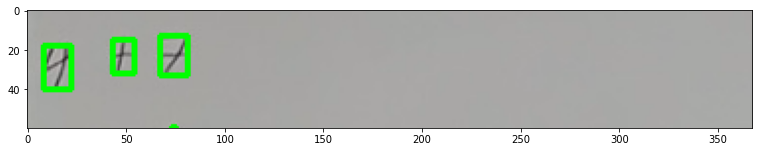

len of images:  3
1/1 [==============================] - 0s 27ms/step


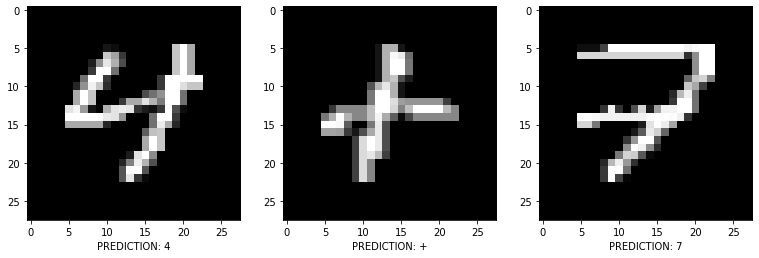

>>> Equation Output >>>
4 + 7 = 11


In [58]:
# image = cv2.imread('../datasets/add_secondSetFlash.jpg')

image = cv2.imread("./IMG_8942_2.jpg")

# image = cv2.imread('../model_analytics/IMG_8789.jpg')

grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
bounded_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape
    padded_digit = digit.copy()

    # @TODO Update pipeline to throw out garbage values
    # Figure out A way to put this before the rectangle is placed on image or this contour will apppear
    # Garbage values occur when the contoured area is less than 25 square pizels EX: (5,5)
    img_pixel_area = x * y
    if (img_pixel_area < 25):
        continue

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    # bounded_digits.append(digit)

print("\n----------------Contoured Image--------------------")

fig = plt.figure(figsize=(13, 13))

plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

# display_list_of_images(preprocessed_digits)


bounded_digit_index = 0

print("len of images: ", len(preprocessed_digits))
columns = 3
# rows = math.ceil( len(preprocessed_digits) / columns)
rows = 1
fig = plt.figure(figsize=(13, 13))

predictions = []
for i in range(0, columns):
    # Make prediction on each image before plotting
    prediction = model.predict(preprocessed_digits[i].reshape(1, 28, 28, 1))

    pred_label = np.argmax(prediction)
    if (pred_label == 10):
        pred_label = "+"

    predictions.append(pred_label)

    p = fig.add_subplot(rows, columns, i+1)
    plt.xlabel('PREDICTION: {0}'.format(pred_label), fontsize=10)    
    plt.imshow(preprocessed_digits[i], cmap='gray')

plt.show()


print(">>> Equation Output >>>")

# Perform the arithmetic on the predictions
# Anticipates there are only 2 numbers and add operator
# @TODO Make a prediction method that returns an enum of the its prediction
def solve_equation(prediction_labels):

    equation = ""
    for item in prediction_labels:

        if (item == "+"):
            equation += item + " "
            continue
        
        equation += str(item) + " "

    return equation


eq = solve_equation(predictions)
print(eq + "= " +str(eval(eq)))
